#build a functional api model 
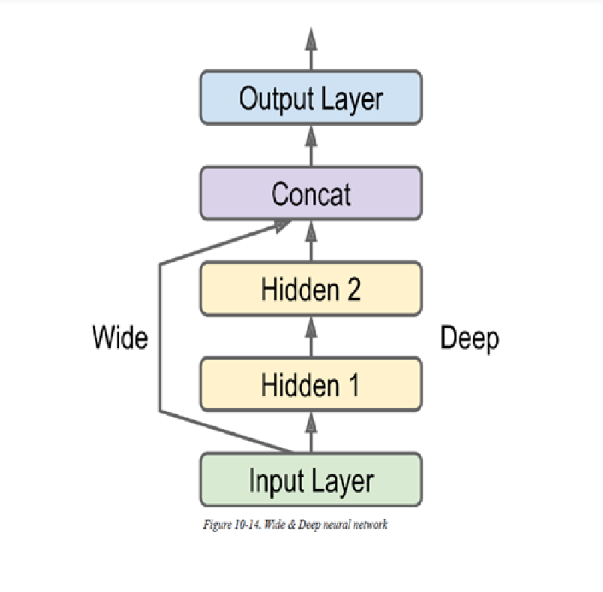

# **import libraries**

In [ ]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Dense,Input
from keras.models import Model
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# **Load dataset**

In [ ]:
housing = fetch_california_housing()
x_train_full,x_test,y_train_full,y_test = train_test_split(housing.data,housing.target)
x_train,x_valid,y_train,y_valid = train_test_split(x_train_full,y_train_full)

# **See Dataset**

In [ ]:
print(x_train.shape,y_train.shape)

(11610, 8) (11610,)


# **Normalise values**

In [ ]:
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_valid = ss.transform(x_valid)
x_test = ss.transform(x_test)

# **Start building fucntional model**

In [ ]:
input = Input(shape = (8))
hidden_layer1 = Dense(30,activation = 'relu')(input)
hidden_layer2 = Dense(30,activation = 'relu')(hidden_layer1)
concat = keras.layers.concatenate([input , hidden_layer2])
output_layer = Dense(1,activation = 'linear')(concat)
model = Model(inputs = [input],outputs = [output_layer])

In [ ]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_18 (Dense)               (None, 30)           270         ['input_7[0][0]']                
                                                                                                  
 dense_19 (Dense)               (None, 30)           930         ['dense_18[0][0]']               
                                                                                                  
 concatenate_6 (Concatenate)    (None, 38)           0           ['input_7[0][0]',                
                                                                  'dense_19[0][0]']         

# **Compile and Fit model**

In [ ]:
model.compile(loss = 'mean_squared_error',optimizer = 'adam',metrics = ['accuracy'])
history = model.fit(x_train,y_train,epochs = 30,validation_data=(x_valid,y_valid))

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 1.1599 - accuracy: 0.0028 - val_loss: 0.5601 - val_accuracy: 0.0036
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5018 - accuracy: 0.0031 - val_loss: 0.4377 - val_accuracy: 0.0036
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4115 - accuracy: 0.0031 - val_loss: 0.4017 - val_accuracy: 0.0036
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3865 - accuracy: 0.0031 - val_loss: 0.3873 - val_accuracy: 0.0036
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3729 - accuracy: 0.0031 - val_loss: 0.3716 - val_accuracy: 0.0036
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3599 - accuracy: 0.0031 - val_loss: 0.3604 - val_accuracy: 0.0036
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3542 - accuracy: 0.0031 - val_loss: 0.3485 - val_accuracy: 0.0036
Epoch 

In [ ]:
model.evaluate(x_test,y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.4947 - accuracy: 0.0023


[0.494745671749115, 0.0023255813866853714]

In [ ]:
y_pred = model.predict(x_test)
print(y_pred)

[[1.7799499]
 [1.2515773]
 [2.7882907]
 ...
 [2.0980525]
 [1.3578761]
 [5.0363445]]
